<a href="https://colab.research.google.com/github/merdogan97/DAwPY/blob/main/DAwPy_S11_12_(EDA_PROJECT_SOLUTION)_05_02_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align: center"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

%matplotlib inline

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

pd.options.display.max_rows = 150
pd.options.display.max_columns = 100

# Read data from file

In [27]:
df = pd.read_csv("adult_eda.csv")

# Try to understand what the data looks like? What are types of the features? Are there any missing values? Do I need to eliminate some features?  

In [28]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13.000,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9.000,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7.000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13.000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [29]:
df.shape

(32561, 15)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  int64  
 1   workclass       32561 non-null  object 
 2   fnlwgt          32561 non-null  int64  
 3   education       32561 non-null  object 
 4   education-num   31759 non-null  float64
 5   marital-status  32561 non-null  object 
 6   occupation      32561 non-null  object 
 7   relationship    27493 non-null  object 
 8   race            32561 non-null  object 
 9   sex             32561 non-null  object 
 10  capital-gain    32561 non-null  int64  
 11  capital-loss    32561 non-null  int64  
 12  hours-per-week  32561 non-null  int64  
 13  native-country  32561 non-null  object 
 14  salary          32561 non-null  object 
dtypes: float64(1), int64(5), object(9)
memory usage: 3.7+ MB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.000,38.582,13.640,17.000,28.000,37.000,48.000,90.000
fnlwgt,32561.000,189778.367,105549.978,12285.000,117827.000,178356.000,237051.000,1484705.000
education-num,31759.000,10.083,2.576,1.000,9.000,10.000,12.000,16.000
capital-gain,32561.000,1077.649,7385.292,0.000,0.000,0.000,0.000,99999.000
capital-loss,32561.000,87.304,402.960,0.000,0.000,0.000,0.000,4356.000
hours-per-week,32561.000,40.437,12.347,1.000,40.000,40.000,45.000,99.000


In [31]:
df.isnull().sum()  # 0 'ların null olmadığı anlamına gelmez farklı karakterler olabilir.
                   # object'lerde farklı krkterler olabilir. (?,-,unknown)
                   # sayısal olsa zaten gözükür

age                  0
workclass            0
fnlwgt               0
education            0
education-num      802
marital-status       0
occupation           0
relationship      5068
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country       0
salary               0
dtype: int64

# Look at the value counts of columns that have object datatype and replace '?' like values with 'Unknown' word.  

In [32]:
df.columns  # hangileri nümerik ? b,ilemem

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [33]:
object_col= df.select_dtypes(include= "object").columns # object olanları 
object_col

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'salary'],
      dtype='object')

In [34]:
for col in object_col:
  print(col)
  print("--"*5)
  print(df[col].value_counts(dropna=False)) # dropna yazmaya untmayın yoksa atlayabilir
  print("--"*10)

workclass
----------
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
--------------------
education
----------
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64
--------------------
marital-status
----------
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital-status, dtype

In [ ]:
df.describe(include="object").T

,count,unique,top,freq
workclass,32561,9,Private,22696
education,32561,16,HS-grad,10501
marital-status,32561,7,Married-civ-spouse,14976
occupation,32561,15,Prof-specialty,4140
relationship,27493,5,Husband,13193
race,32561,5,White,27816
sex,32561,2,Male,21790
native-country,32561,42,United-States,29170
salary,32561,2,<=50K,24720


In [35]:
object_col = df.select_dtypes(include='object').columns
object_col

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'salary'],
      dtype='object')

In [36]:
for col in object_col:
    print(col)
    print("--"*5)
    print(df[col].value_counts(dropna=False))
    print("--"*10)

workclass
----------
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
--------------------
education
----------
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64
--------------------
marital-status
----------
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital-status, dtype

In [37]:
df[df.isin(['?'])].any()  # hangilerinde ? var

age               False
workclass          True
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation         True
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country     True
salary            False
dtype: bool

In [40]:
#look at workclass column here
df.workclass.value_counts(dropna=False)                     # 1836 ? var ve "unknown yapmam gerekiyor"

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
Unknown              1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [41]:
# df.loc[df.workclass == "?", "workclass"] = "Unknown"
df.workclass.replace('?','Unknown', inplace=True)

In [42]:
df.occupation.value_counts(dropna=False)

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [45]:
df.occupation.replace('?','Unknown', inplace=True)
df.occupation

0             Adm-clerical
1          Exec-managerial
2        Handlers-cleaners
3        Handlers-cleaners
4           Prof-specialty
               ...        
32556         Tech-support
32557    Machine-op-inspct
32558         Adm-clerical
32559         Adm-clerical
32560      Exec-managerial
Name: occupation, Length: 32561, dtype: object

In [47]:
df["native-country"].value_counts(dropna=False)

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

In [49]:
df["native-country"].replace('?','Unknown', inplace=True)

In [50]:
df[df.isin(['?'])].any()  # Tüm ? leri değiştirilmiş oldu

age               False
workclass         False
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation        False
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country    False
salary            False
dtype: bool

# **Hepsini birden değiştirmek için :**

In [ ]:
#replace all '?' in whole df with 'Unknown'
#df=df.replace({'?':'UNKNOWN'})

# **Do education and education_num columns hold similar information? If so drop the appropriate choice between them.**

In [53]:
df.education.value_counts(dropna=False) # dropna unutma !!! 

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [52]:
df['education-num'].value_counts(dropna=False)  # NAN var burada farklı olarak

9.000     10215
10.000     7098
13.000     5247
14.000     1687
11.000     1343
7.000      1146
12.000     1044
6.000       916
NaN         802
4.000       631
15.000      559
5.000       503
8.000       424
16.000      405
3.000       330
2.000       161
1.000        50
Name: education-num, dtype: int64

In [ ]:
df.groupby('education')['education-num'].value_counts(dropna=False) 
# her bir edcucation unique değerinde kaçar old. verdi. Bir karışıklık yok. Tek değer var ve NAN var.
# o zaman education num sütunu NAN'lar var ve düşebilirim

education     education-num
10th          6.000              916
              NaN                 17
11th          7.000             1146
              NaN                 29
12th          8.000              424
              NaN                  9
1st-4th       2.000              161
              NaN                  7
5th-6th       3.000              330
              NaN                  3
7th-8th       4.000              631
              NaN                 15
9th           5.000              503
              NaN                 11
Assoc-acdm    12.000            1044
              NaN                 23
Assoc-voc     11.000            1343
              NaN                 39
Bachelors     13.000            5247
              NaN                108
Doctorate     16.000             405
              NaN                  8
HS-grad       9.000            10215
              NaN                286
Masters       14.000            1687
              NaN                 36
Preschool 

In [54]:
#drop one of them here
df.drop('education-num',axis=1,inplace=True)

In [55]:
df.isnull().sum()

age                  0
workclass            0
fnlwgt               0
education            0
marital-status       0
occupation           0
relationship      5068
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country       0
salary               0
dtype: int64

# **Impute missing values in relationship column with 'Unmarried'. Also replace 'Not-in-family','Other-relative' values in this column with 'Unmarried'?**

In [56]:
df.relationship.value_counts(dropna=False) # 

Husband           13193
Not-in-family      8305
NaN                5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

In [59]:
df.relationship.replace(np.nan, "None", inplace=True) # None'ların neye karşılık geldiğini görmek istedim
#df.relationship.fillna("None", inplace=True)

In [60]:
df["marital-status"].value_counts(dropna=False) # 2'sini GRUPLANDIRIP NAN'ların durumunu görmek istiyorum

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital-status, dtype: int64

In [61]:
df.groupby("relationship")["marital-status"].value_counts(dropna=False)

relationship    marital-status       
Husband         Married-civ-spouse       13184
                Married-AF-spouse            9
None            Never-married             4485
                Divorced                   328
                Separated                   99
                Married-civ-spouse          95
                Married-spouse-absent       45
                Widowed                     15
                Married-AF-spouse            1
Not-in-family   Never-married             4706
                Divorced                  2404
                Widowed                    547
                Separated                  420
                Married-spouse-absent      211
                Married-civ-spouse          17
Other-relative  Never-married              611
                Married-civ-spouse         124
                Divorced                   110
                Separated                   55
                Widowed                     48
                Marrie

In [ ]:
# kategori sayısını azaltmak için Not-in-family','Other-relative' values değiştirebilirim

In [ ]:
#df.relationship.replace([np.nan, 'Not-in-family', 'Other-relative'], 'Unmarried')
#df.relationship.replace({np.nan:'Unmarried','Not-in-family':'Unmarried','Other-relative':'Unmarried'})

In [65]:
df.relationship.replace("None", np.nan, inplace=True)

In [66]:
df.relationship.replace([np.nan, 'Not-in-family', 'Other-relative'], 'Unmarried', inplace=True)

In [67]:
df.relationship.value_counts()

Unmarried    17800
Husband      13193
Wife          1568
Name: relationship, dtype: int64

In [68]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [69]:
df.describe(include="object").T

,count,unique,top,freq
workclass,32561,9,Private,22696
education,32561,16,HS-grad,10501
marital-status,32561,7,Married-civ-spouse,14976
occupation,32561,15,Prof-specialty,4140
relationship,32561,3,Unmarried,17800
race,32561,5,White,27816
sex,32561,2,Male,21790
native-country,32561,42,United-States,29170
salary,32561,2,<=50K,24720


# **Take a look at correlation between variables and also see if there are some outliers in any of the columns.**

In [70]:
df.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Unmarried,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Unmarried,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [71]:
df.salary.value_counts(dropna=False) # değerleri nümerik hale çevirmem gerekiyor.

<=50K    24720
>50K      7841
Name: salary, dtype: int64

In [73]:
df.salary.map({"<=50K" : 0, ">50K" : 1}) # şimdi bunu yeni bir sütuna atarım. eski sütunu kullanacağım

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: salary, Length: 32561, dtype: int64

In [75]:
df["salary_num"] = df.salary.map({"<=50K" : 0, ">50K" : 1})

In [76]:
df.salary_num.value_counts(dropna=False)

0    24720
1     7841
Name: salary_num, dtype: int64

In [77]:
df                                                                   # yeni sütun DF 'te görülüyor

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,salary_num
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Unmarried,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Unmarried,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0
32557,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,1
32558,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,0
32559,22,Private,201490,HS-grad,Never-married,Adm-clerical,Unmarried,White,Male,0,0,20,United-States,<=50K,0


In [78]:
df.corr()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,salary_num
age,1.000,-0.077,0.078,0.058,0.069,0.234
fnlwgt,-0.077,1.000,0.000,-0.010,-0.019,-0.009
capital-gain,0.078,0.000,1.000,-0.032,0.078,0.223
capital-loss,0.058,-0.010,-0.032,1.000,0.054,0.151
hours-per-week,0.069,-0.019,0.078,0.054,1.000,0.230
salary_num,0.234,-0.009,0.223,0.151,0.230,1.000


In [79]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.000,38.582,13.640,17.000,28.000,37.000,48.000,90.000
fnlwgt,32561.000,189778.367,105549.978,12285.000,117827.000,178356.000,237051.000,1484705.000
capital-gain,32561.000,1077.649,7385.292,0.000,0.000,0.000,0.000,99999.000
capital-loss,32561.000,87.304,402.960,0.000,0.000,0.000,0.000,4356.000
hours-per-week,32561.000,40.437,12.347,1.000,40.000,40.000,45.000,99.000
salary_num,32561.000,0.241,0.428,0.000,0.000,0.000,0.000,1.000


# **Age**

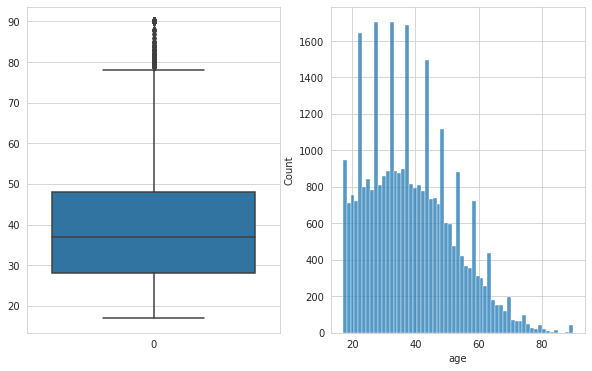

In [80]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.boxplot(data=df.age)
plt.subplot(1,2,2)
sns.histplot(data=df.age);

In [81]:
low = df.age.quantile(0.25)
high = df.age.quantile(0.75)
IQR = high - low
low, high, IQR

(28.0, 48.0, 20.0)

In [83]:
lower_lim = low - (1.5 * IQR)
upper_lim = high + (1.5 * IQR)
lower_lim, upper_lim

(-2.0, 78.0)

In [84]:
df[df["age"] > 78]["age"].value_counts() # NAN olmadığını bildiğim için dropna yazmadım

90    43
79    22
80    22
81    20
82    12
84    10
83     6
88     3
85     3
86     1
87     1
Name: age, dtype: int64

In [85]:
df[df["age"] > 78].sort_values(by="age", ascending=False)  # 78'den büyükleri inceleyelim

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,salary_num
12451,90,Unknown,225063,Some-college,Never-married,Unknown,Unmarried,Asian-Pac-Islander,Male,0,0,10,South,<=50K,0
10545,90,Private,175491,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,9386,0,50,Ecuador,>50K,1
5406,90,Private,51744,Masters,Never-married,Exec-managerial,Unmarried,Black,Male,0,0,50,United-States,>50K,1
19747,90,Private,226968,7th-8th,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K,0
28463,90,Federal-gov,195433,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,30,United-States,<=50K,0
11512,90,Private,87285,HS-grad,Never-married,Other-service,Unmarried,White,Female,0,0,24,United-States,<=50K,0
6232,90,Self-emp-not-inc,155981,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,10566,0,50,United-States,<=50K,0
24238,90,Unknown,166343,1st-4th,Widowed,Unknown,Unmarried,Black,Female,0,0,40,United-States,<=50K,0
6624,90,Private,313986,11th,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K,0
14159,90,Local-gov,187749,Assoc-acdm,Married-civ-spouse,Adm-clerical,Husband,Asian-Pac-Islander,Male,0,0,20,Philippines,<=50K,0


# **hours_per_week**

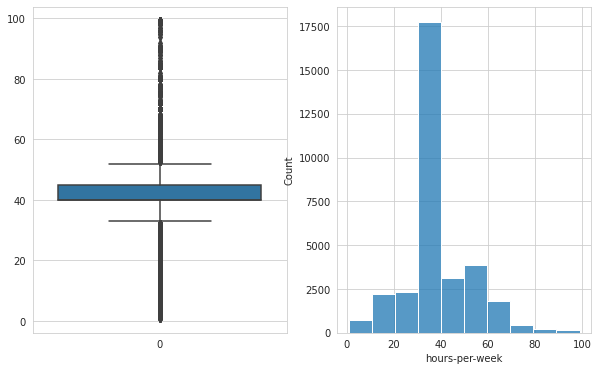

In [86]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.boxplot(data=df["hours-per-week"])
plt.subplot(1,2,2)
sns.histplot(data=df["hours-per-week"], bins=10);

In [87]:
low = df["hours-per-week"].quantile(0.25)
high = df["hours-per-week"].quantile(0.75)
IQR = high - low
low, high, IQR

(40.0, 45.0, 5.0)

In [88]:
lower_lim = low - (1.5 * IQR)
upper_lim = high + (1.5 * IQR)
lower_lim, upper_lim

(32.5, 52.5)

In [90]:
df[df["hours-per-week"] > 52.5]["hours-per-week"].value_counts() # karışık verdi 

60    1475
55     694
70     291
65     244
80     133
56      97
99      85
72      71
75      66
84      45
54      41
90      29
58      28
53      25
62      18
66      17
57      17
64      14
85      13
68      12
98      11
63      10
78       8
77       6
59       5
96       5
67       4
91       3
81       3
76       3
88       2
73       2
89       2
97       2
86       2
61       2
95       2
94       1
87       1
82       1
92       1
74       1
Name: hours-per-week, dtype: int64

In [91]:
df[df["hours-per-week"] > 52.5]["hours-per-week"].value_counts().sort_index(ascending=False) # sıraladım

99      85
98      11
97       2
96       5
95       2
94       1
92       1
91       3
90      29
89       2
88       2
87       1
86       2
85      13
84      45
82       1
81       3
80     133
78       8
77       6
76       3
75      66
74       1
73       2
72      71
70     291
68      12
67       4
66      17
65     244
64      14
63      10
62      18
61       2
60    1475
59       5
58      28
57      17
56      97
55     694
54      41
53      25
Name: hours-per-week, dtype: int64

In [92]:
df[df["hours-per-week"] > 52.5].sort_values(by="hours-per-week", ascending=False)

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,salary_num
25986,44,Local-gov,212665,Some-college,Married-civ-spouse,Protective-serv,Husband,Black,Male,0,0,99,United-States,<=50K,0
23179,31,Private,511289,HS-grad,Never-married,Farming-fishing,Unmarried,White,Male,2907,0,99,United-States,<=50K,0
13558,38,Private,191103,Prof-school,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,99,United-States,>50K,1
9831,67,Private,35015,Masters,Never-married,Prof-specialty,Unmarried,White,Male,0,0,99,United-States,<=50K,0
13580,38,Self-emp-not-inc,112158,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,99,United-States,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23481,23,Private,181820,HS-grad,Separated,Craft-repair,Unmarried,White,Male,0,0,53,United-States,<=50K,0
28858,62,Private,123411,7th-8th,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,53,United-States,<=50K,0
15889,43,Federal-gov,155106,Bachelors,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,53,United-States,<=50K,0
15908,22,Local-gov,163205,HS-grad,Never-married,Other-service,Unmarried,White,Female,0,0,53,United-States,<=50K,0


In [ ]:
df[(df["hours-per-week"] == 99)].sample(10)

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,salary_num
29989,43,Local-gov,118853,Some-college,Married-civ-spouse,Tech-support,Husband,White,Male,4386,0,99,United-States,>50K,1
935,37,Private,176900,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,99,United-States,>50K,1
10266,56,Self-emp-inc,184598,9th,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,99,United-States,<=50K,0
12788,24,State-gov,208826,Doctorate,Never-married,Prof-specialty,Unmarried,White,Female,0,0,99,England,<=50K,0
15356,90,Private,90523,HS-grad,Widowed,Transport-moving,Unmarried,White,Male,0,0,99,United-States,<=50K,0
26858,66,Private,262285,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,99,United-States,<=50K,0
18603,33,Self-emp-not-inc,67482,Assoc-voc,Divorced,Other-service,Unmarried,White,Female,0,0,99,United-States,<=50K,0
10986,38,Private,111499,HS-grad,Married-civ-spouse,Sales,Husband,White,Male,0,1977,99,United-States,>50K,1
11833,58,Private,164857,Bachelors,Never-married,Prof-specialty,Unmarried,White,Male,0,0,99,United-States,<=50K,0
22216,45,Private,54260,Some-college,Divorced,Craft-repair,Unmarried,White,Male,0,0,99,United-States,<=50K,0


In [93]:
df.groupby("workclass")["hours-per-week"].mean()

workclass
Federal-gov        41.379
Local-gov          40.983
Never-worked       28.429
Private            40.267
Self-emp-inc       48.818
Self-emp-not-inc   44.422
State-gov          39.032
Unknown            31.919
Without-pay        32.714
Name: hours-per-week, dtype: float64

In [94]:
df[df["hours-per-week"] > 52.5].groupby("workclass")["hours-per-week"].mean()

workclass
Federal-gov        62.000
Local-gov          62.600
Private            62.411
Self-emp-inc       64.164
Self-emp-not-inc   65.823
State-gov          64.053
Unknown            66.292
Without-pay        60.000
Name: hours-per-week, dtype: float64

In [96]:
df[df["hours-per-week"] ==99].groupby("workclass")["hours-per-week"].count()

workclass
Federal-gov          1
Local-gov            4
Private             44
Self-emp-inc         9
Self-emp-not-inc    21
State-gov            1
Unknown              5
Name: hours-per-week, dtype: int64

In [ ]:
df[(df["hours-per-week"] == 99)].age.value_counts().sort_index(ascending=False)

90    1
73    1
72    1
67    1
66    2
65    1
64    1
62    1
61    2
59    1
58    2
56    1
55    3
53    3
51    4
50    2
49    2
45    3
44    4
43    6
42    1
40    2
39    5
38    5
37    4
36    1
35    3
34    1
33    1
32    2
31    4
30    3
29    1
28    2
27    3
26    1
25    2
24    1
19    1
Name: age, dtype: int64

# **Boxplot and Histplot for all numeric features**

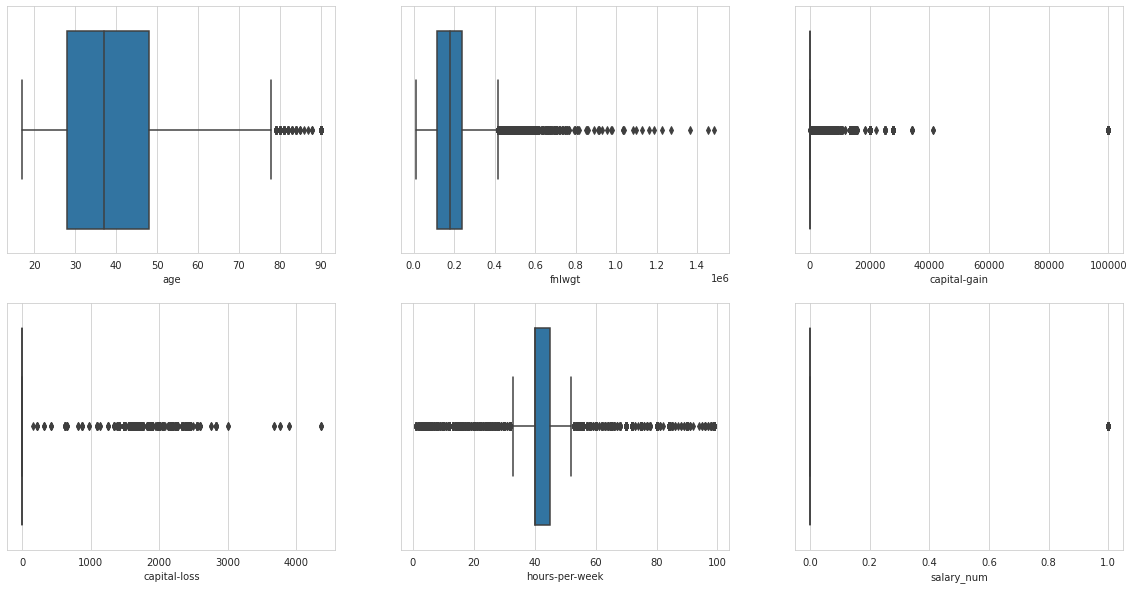

In [97]:
index = 0
plt.figure(figsize=(20,10))
for feature in df.select_dtypes('number').columns:
    index += 1
    plt.subplot(2,3,index)
    sns.boxplot(x=feature, data=df, whis=1.5)

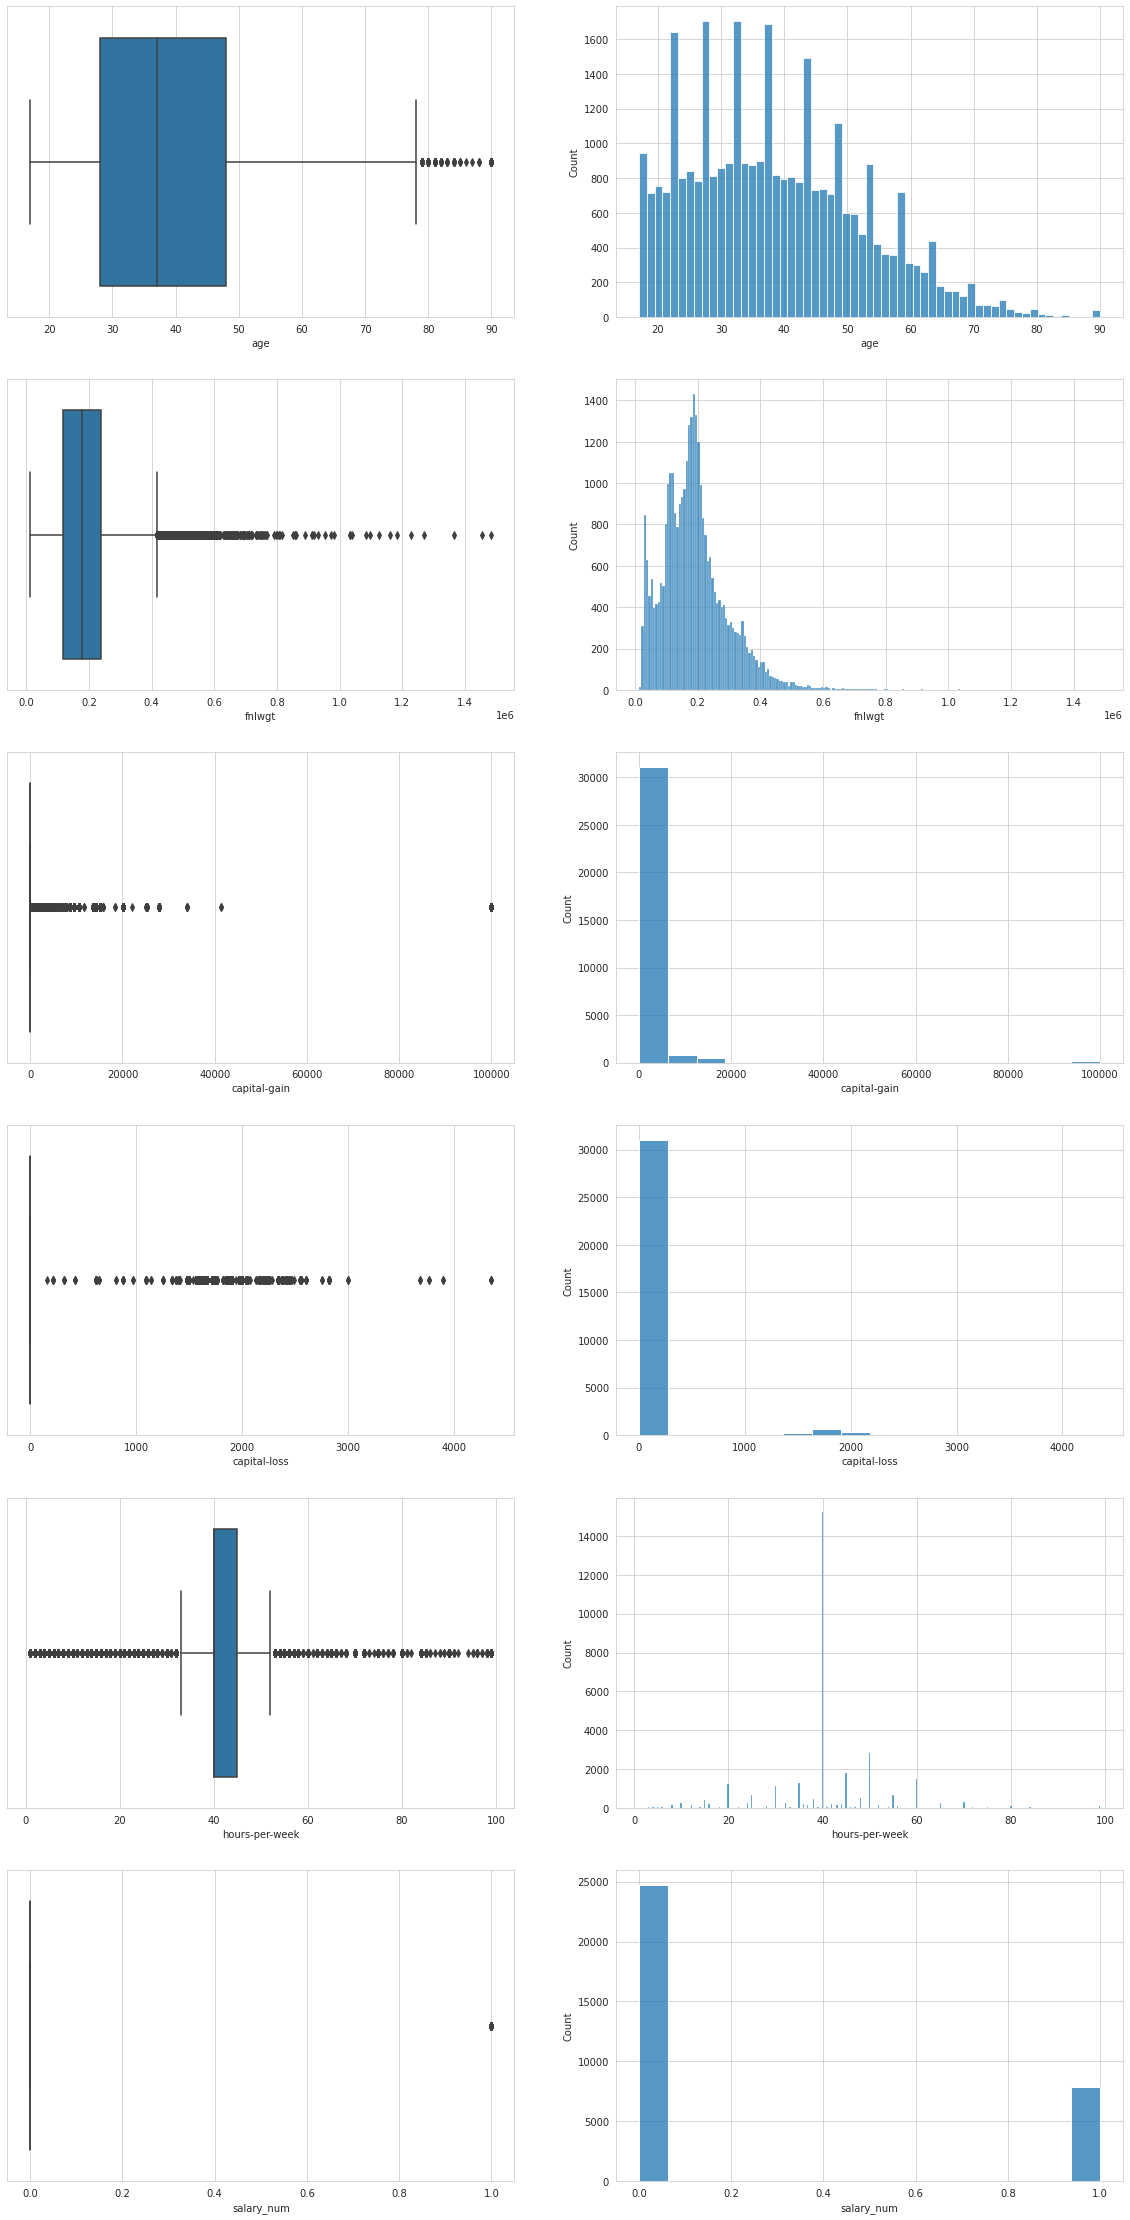

In [98]:
index = 0
plt.figure(figsize=(20,40))
for feature in df.select_dtypes('number').columns:
    index += 1
    plt.subplot(6,2, index)
    sns.boxplot(x=feature, data=df, whis=1.5)
    index += 1
    plt.subplot(6,2,index)
    sns.histplot(x=feature, data=df)

# **After looking at the outliers you can drop the rows which actually does not make any sense.**
**Hint: You can check age and hours per week columns.**

find outlier values which extends the upper limit in both age and hours-per-week columns

In [99]:
df[(df['age']>78) & (df['hours-per-week']>52.5)]

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,salary_num
3777,80,Private,87518,Some-college,Never-married,Prof-specialty,Unmarried,White,Male,0,1816,60,United-States,<=50K,0
5370,90,Local-gov,227796,Masters,Married-civ-spouse,Exec-managerial,Husband,White,Male,20051,0,60,United-States,>50K,1
7481,83,Private,195507,HS-grad,Widowed,Protective-serv,Unmarried,White,Male,0,0,55,United-States,<=50K,0
7720,84,Private,241065,Masters,Never-married,Prof-specialty,Unmarried,White,Male,0,0,66,United-States,<=50K,0
8806,90,Private,87372,Prof-school,Married-civ-spouse,Prof-specialty,Husband,White,Male,20051,0,72,United-States,>50K,1
11996,90,Private,40388,Bachelors,Never-married,Exec-managerial,Unmarried,White,Male,0,0,55,United-States,<=50K,0
12830,81,Private,201398,Masters,Widowed,Prof-specialty,Unmarried,White,Male,0,0,60,Unknown,<=50K,0
15356,90,Private,90523,HS-grad,Widowed,Transport-moving,Unmarried,White,Male,0,0,99,United-States,<=50K,0
24395,83,Self-emp-inc,153183,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,2392,55,United-States,>50K,1


In [101]:
drop_index=df[(df['age']>78) & (df['hours-per-week']>52.5)].index  # 9 kişiyi düşeceğim
drop_index     # index deyince index numaralarını  da alır

Int64Index([3777, 5370, 7481, 7720, 8806, 11996, 12830, 15356, 24395], dtype='int64')

In [102]:
df.drop(index=drop_index, inplace=True)

In [ ]:
# check outlier values which extends the upper limit in both age and hours-per-week columns
df[(df['age']>78) & (df['hours-per-week']>52.5)]

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,salary_num


# **ANALİZ SAFHASINA GEÇEBİLİRİM**

# **---**
# **How many of each race are represented in this dataset?**
---

In [103]:
df.race.value_counts()

White                 27807
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

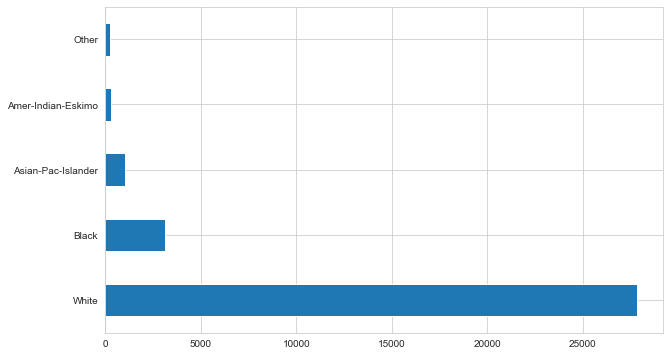

In [ ]:
df.race.value_counts().plot.barh();

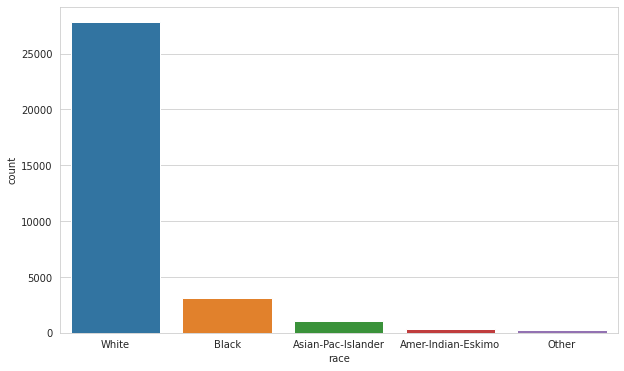

In [104]:
sns.countplot(df.race)  # Count plot KATEGORİK VERİLERDE KULLANILIR

---
# **What is the average age of men/women?**
---

In [105]:
average_age_men = df.loc[df['sex']=='Male','age'].mean() # cinsiyeti sadece MALE olanlar
average_age_men

39.41444378127726

In [108]:
df[df.sex=="Male"]["age"].mean() # 2. yöntem

39.41444378127726

In [106]:
average_age_men1 = df[df.sex=='Male']['age'].mean()
average_age_men1

39.41444378127726

In [109]:
round(average_age_men,1)

39.4

In [110]:
df.loc[df['sex']=='Male','age'].value_counts() 

35    630
34    629
37    629
33    620
36    611
31    606
38    591
30    588
41    575
32    573
39    560
28    557
42    552
29    542
43    541
27    541
40    531
25    528
44    522
23    518
45    512
46    509
26    495
47    494
24    493
50    446
51    432
22    423
49    406
21    391
20    390
48    372
19    356
52    344
53    328
54    310
55    282
18    282
57    267
58    261
59    261
56    260
60    233
61    221
17    209
62    170
63    166
64    138
65    121
66    102
67     99
68     78
69     75
70     61
71     46
72     42
73     42
74     32
75     31
76     30
90     25
77     20
79     17
80     16
78     16
81     10
82     10
84      5
83      3
88      2
85      2
87      1
Name: age, dtype: int64

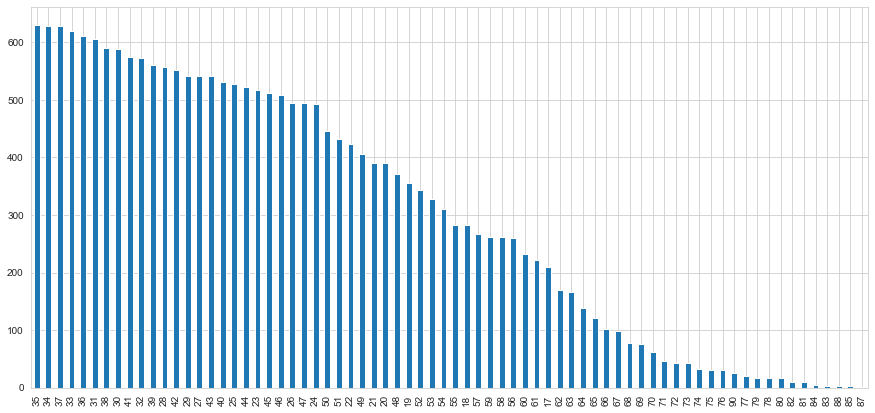

In [ ]:
plt.figure(figsize = (15,7))
df.loc[df["sex"] == "Male", "age"].value_counts().plot.bar();

In [ ]:
average_age_women = df.loc[df.sex=='Female','age'].mean()
average_age_women 

36.85823043357163

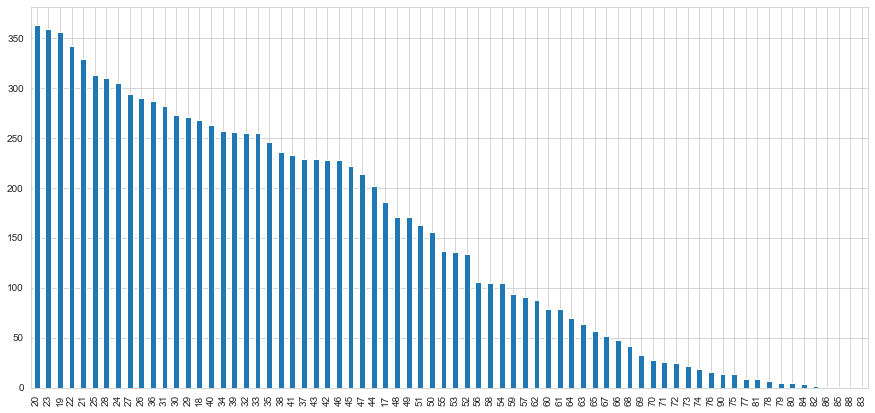

In [ ]:
plt.figure(figsize = (15,7))
df.loc[df["sex"] == "Female", "age"].value_counts().plot.bar();

---
# **What is the percentage of people who have a Bachelor's degree?**
---

In [111]:
df.groupby('education').education.count()

education
10th              933
11th             1175
12th              433
1st-4th           168
5th-6th           333
7th-8th           646
9th               514
Assoc-acdm       1067
Assoc-voc        1382
Bachelors        5353
Doctorate         413
HS-grad         10499
Masters          1720
Preschool          51
Prof-school       575
Some-college     7290
Name: education, dtype: int64

In [ ]:
df.education.value_counts() # yukarıdakinin daha kolay yöntemi,  fark yok !

HS-grad         10499
Some-college     7290
Bachelors        5353
Masters          1720
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       575
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [ ]:
df.education.value_counts().loc['Bachelors'] # loc ile Bachelors çekebilirim

5353

In [ ]:
len(df) # DF uzunluğunu bulurum

32552

In [112]:
bachelors = df.education.value_counts().loc['Bachelors']
total = len(df)

In [ ]:
percentage_bachelors = bachelors / total * 100
percentage_bachelors

16.44445809781273

# **Kolay Yolu:**

In [ ]:
df["education"].value_counts(normalize=True)  # Direkt metod:  böyle yapsam her bir unique değerin o sütundaki oranını varir

HS-grad        0.323
Some-college   0.224
Bachelors      0.164
Masters        0.053
Assoc-voc      0.042
11th           0.036
Assoc-acdm     0.033
10th           0.029
7th-8th        0.020
Prof-school    0.018
9th            0.016
12th           0.013
Doctorate      0.013
5th-6th        0.010
1st-4th        0.005
Preschool      0.002
Name: education, dtype: float64

In [113]:
percentage_bachelors = df["education"].value_counts(normalize=True).loc["Bachelors"]*100
round(percentage_bachelors,1)

16.4

# **Rapor yaparken açıklamalı yazmak daha iyi olur :!!!!!**

In [114]:
print(f"The percentage of people who have a Bachelor's degree : %{round(percentage_bachelors,1)}")

The percentage of people who have a Bachelor's degree : %16.4


---
# **What percentage of people with advanced education (`Bachelors`, `Masters`, or `Doctorate`) make more than 50K?**
---

In [ ]:
df.salary.value_counts()

<=50K    24714
>50K      7838
Name: salary, dtype: int64

In [115]:
df.education.value_counts()

HS-grad         10499
Some-college     7290
Bachelors        5353
Masters          1720
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       575
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [ ]:
df.education.isin(["Bachelors", "Masters", "Doctorate"])
#(df.education=='Bachelors') | (df.education=='Masters') | (df.education=='Doctorate')

0         True
1         True
2        False
3        False
4         True
         ...  
32556    False
32557    False
32558    False
32559    False
32560    False
Name: education, Length: 32552, dtype: bool

In [116]:
df.salary=='>50K'  # 2'sini birleştirirsem 

0        False
1        False
2        False
3        False
4        False
         ...  
32556    False
32557     True
32558    False
32559    False
32560     True
Name: salary, Length: 32552, dtype: bool

In [ ]:
df[(df.education.isin(["Bachelors", "Masters", "Doctorate"]))&(df.salary=='>50K')]

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,salary_num
8,31,Private,45781,Masters,Never-married,Prof-specialty,Unmarried,White,Female,14084,0,50,United-States,>50K,1
9,42,Private,159449,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K,1
11,30,State-gov,141297,Bachelors,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K,1
19,43,Self-emp-not-inc,292175,Masters,Divorced,Exec-managerial,Unmarried,White,Female,0,0,45,United-States,>50K,1
20,40,Private,193524,Doctorate,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32533,54,Private,337992,Bachelors,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,50,Japan,>50K,1
32536,34,Private,160216,Bachelors,Never-married,Exec-managerial,Unmarried,White,Female,0,0,55,United-States,>50K,1
32538,38,Private,139180,Bachelors,Divorced,Prof-specialty,Unmarried,Black,Female,15020,0,45,United-States,>50K,1
32539,71,Unknown,287372,Doctorate,Married-civ-spouse,Unknown,Husband,White,Male,0,0,10,United-States,>50K,1


In [ ]:
# uzunluğu (kaç kişi):
len(df[(df.education.isin(["Bachelors", "Masters", "Doctorate"]))&(df.salary=='>50K')])

3484

In [119]:
df[(df.education.isin(["Bachelors", "Masters", "Doctorate"]))&(df.salary=='>50K')].shape[0]

3484

In [117]:
df.shape[0]

32552

In [121]:
high_edu_high_sal = len(df[(df.education.isin(["Bachelors", "Masters", "Doctorate"]))&(df.salary=='>50K')])
total = df.shape[0]

In [122]:
perc_high_edu = high_edu_high_sal/total
perc_high_edu

0.10702875399361023

In [123]:
print(f"Percentage of people with advanced education make more than 50K : {round(perc_high_edu * 100, 2)}")

Percentage of people with advanced education make more than 50K : 10.7


---
# **What percentage of people without advanced education make more than 50K?**
---

In [ ]:
df[(~df.education.isin(["Bachelors", "Masters", "Doctorate"]))&(df.salary=='>50K')]

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,salary_num
7,52,Self-emp-not-inc,209642,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,1
10,37,Private,280464,Some-college,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K,1
14,40,Private,121772,Assoc-voc,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,Unknown,>50K,1
27,54,Unknown,180211,Some-college,Married-civ-spouse,Unknown,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K,1
38,31,Private,84154,Some-college,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,Unknown,>50K,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32518,57,Local-gov,110417,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,99999,0,40,United-States,>50K,1
32519,46,Private,364548,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,48,United-States,>50K,1
32545,39,Local-gov,111499,Assoc-acdm,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,>50K,1
32557,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,1


In [ ]:
#       ~ tersini verir

In [124]:
low_edu_high_sal = len(df[(~df.education.isin(["Bachelors", "Masters", "Doctorate"]))&(df.salary=='>50K')])
total = df.shape[0]

In [126]:
perc_low_edu = low_edu_high_sal / total
perc_low_edu

0.13375522241336937

In [ ]:
print(f"Percentage of people without advanced education make more than 50K : {round(perc_low_edu * 100 ,2)}")

Percentage of people without advanced education make more than 50K : 13.38


In [127]:
if perc_high_edu > perc_low_edu :
    print("More education more money!")
else:
    print("Education has no clear effet on salary. You should investigate some other features also.")

Education has no clear effet on salary. You should investigate some other features also.


---
# **What percentage of the people who work the minimum number of hours per week have a salary of >50K?**
---

In [ ]:
df['hours-per-week'].value_counts()

40    15217
50     2819
45     1824
60     1472
35     1297
20     1224
30     1149
55      691
25      674
48      517
38      476
15      404
70      291
10      278
32      266
24      252
65      244
36      220
42      219
44      212
16      205
12      173
43      151
37      149
8       145
52      138
80      133
56       97
28       86
99       84
46       82
18       75
72       70
75       66
6        64
5        60
4        54
47       49
84       45
22       44
54       41
3        39
33       39
39       38
41       36
14       34
2        32
27       30
26       30
49       29
90       29
17       29
34       28
58       28
7        26
53       25
21       24
13       23
23       21
1        20
62       18
9        18
57       17
66       16
64       14
19       14
51       13
85       13
68       12
11       11
98       11
63       10
78        8
29        7
77        6
31        5
96        5
59        5
67        4
91        3
81        3
76        3
95        2
61  

In [128]:
lazy_riches = (df['hours-per-week']==df['hours-per-week'].min()) & (df.salary =='>50K')
lazy_riches

0        False
1        False
2        False
3        False
4        False
         ...  
32556    False
32557    False
32558    False
32559    False
32560    False
Length: 32552, dtype: bool

In [132]:
df[lazy_riches]                  # Bunlar kimlermiş?

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,salary_num
189,58,State-gov,109567,Doctorate,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,1,United-States,>50K,1
20072,65,Unknown,76043,HS-grad,Married-civ-spouse,Unknown,Husband,White,Male,0,0,1,United-States,>50K,1


In [133]:
num_lazy_riches = df[lazy_riches].shape[0]
num_lazy_riches

2

In [134]:
num_min_workers = len(df[df['hours-per-week']==df['hours-per-week'].min()])
num_min_workers

20

In [135]:
print (f"Percentage of the people who work the minimum number of hours per week have a salary of >50K : % {round(num_lazy_riches/num_min_workers*100)}")

Percentage of the people who work the minimum number of hours per week have a salary of >50K : % 10


 ---
# **What country has the highest percentage of people that earn >50K?**
 ---


In [136]:
country_salary_df = df.groupby('native-country')[['salary']].count()
country_salary_df

,salary
native-country,
Cambodia,19
Canada,121
China,75
Columbia,59
Cuba,95
Dominican-Republic,70
Ecuador,28
El-Salvador,106
England,90


In [137]:
country_salary_df_riches = df[df.salary=='>50K'].groupby('native-country')[['salary']].count()
country_salary_df_riches

,salary
native-country,
Cambodia,7
Canada,39
China,20
Columbia,2
Cuba,25
Dominican-Republic,2
Ecuador,4
El-Salvador,9
England,30


In [138]:
rich_per_country = (country_salary_df_riches/country_salary_df).sort_values('salary',ascending=False)
rich_per_country

,salary
native-country,
Iran,0.419
France,0.414
India,0.400
Taiwan,0.392
Japan,0.387
Yugoslavia,0.375
Cambodia,0.368
Italy,0.342
England,0.333


In [139]:
rich_per_country[rich_per_country.salary==rich_per_country.salary.max()]

,salary
native-country,
Iran,0.419


In [140]:
rich_per_country.loc[[rich_per_country.salary.idxmax()]] # idxmax ile maximum değerin indexini veren yöntem var

,salary
native-country,
Iran,0.419


In [ ]:
rich_per_country.iloc[[0]]           # sort_value yapmadan   LOC  ile çekebilirim.

,salary
native-country,
Iran,0.419


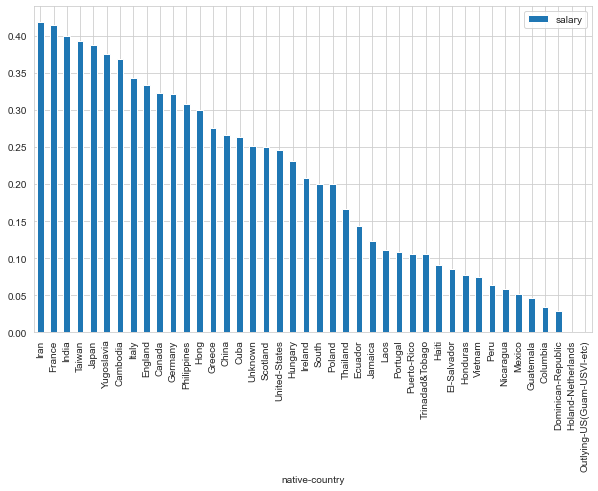

In [ ]:
rich_per_country.plot.bar();

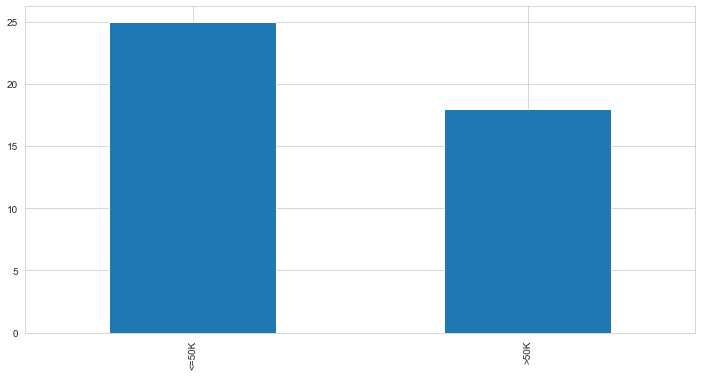

In [ ]:
plt.figure(figsize=(12,6))
df.loc[((df["native-country"] == "Iran")), "salary"].value_counts().plot.bar();

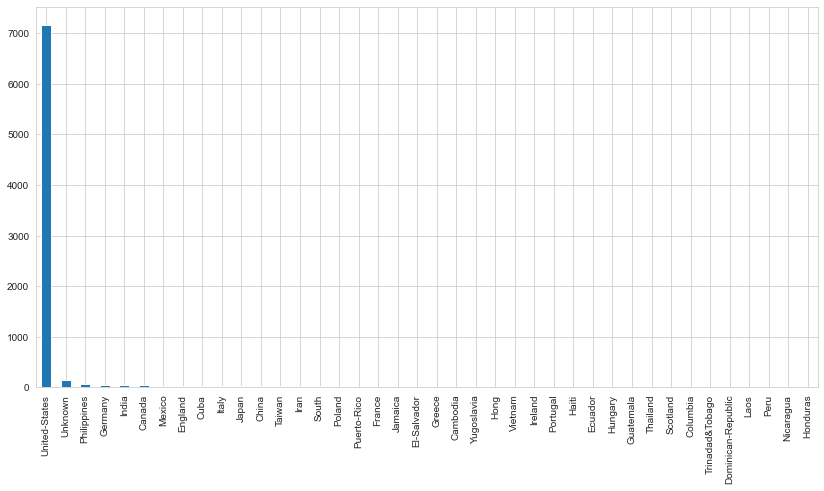

In [ ]:
plt.figure(figsize=(14,7))
df.loc[df["salary"] == ">50K", "native-country"].value_counts().plot(kind="bar");

---
# **Identify the most popular occupation for those who earn >50K in India.**
---

In [141]:
top_IN_occupation = (df['native-country']=='India') & (df.salary=='>50K')   # Conditionı alıp DF içine koyarsam 

top_IN_occupation

0        False
1        False
2        False
3        False
4        False
         ...  
32556    False
32557    False
32558    False
32559    False
32560    False
Length: 32552, dtype: bool

In [ ]:
df[top_IN_occupation] # DF'de occupation sütunu çekersem

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,salary_num
11,30,State-gov,141297,Bachelors,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K,1
968,48,Private,164966,Bachelors,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K,1
1327,52,Private,168381,HS-grad,Widowed,Other-service,Unmarried,Asian-Pac-Islander,Female,0,0,40,India,>50K,1
7258,42,State-gov,102343,Prof-school,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,72,India,>50K,1
7285,54,State-gov,93449,Masters,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K,1
8124,36,Private,172104,Prof-school,Never-married,Prof-specialty,Unmarried,Other,Male,0,0,40,India,>50K,1
9939,43,Federal-gov,325706,Prof-school,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,50,India,>50K,1
10590,35,Private,98283,Prof-school,Never-married,Prof-specialty,Unmarried,Asian-Pac-Islander,Male,0,0,40,India,>50K,1
10661,59,Private,122283,Prof-school,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,99999,0,40,India,>50K,1
10736,30,Private,243190,Prof-school,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,20,India,>50K,1


In [ ]:
df[top_IN_occupation]['occupation'].value_counts() # tek sütunun valucount bakıyorum

Prof-specialty      25
Exec-managerial      8
Other-service        2
Tech-support         2
Sales                1
Transport-moving     1
Adm-clerical         1
Name: occupation, dtype: int64

In [ ]:
df[top_IN_occupation]['occupation'].value_counts().index[0]  

'Prof-specialty'

In [ ]:
 #use mode here
a =  df[top_IN_occupation]["occupation"].mode()[0]
a

'Prof-specialty'

In [ ]:
print(f"{a} the most popular occupation for those who earn >50K in India.")

Prof-specialty the most popular occupation for those who earn >50K in India.


----
---